# What drives the churn rate of a Databel internet service provider?


**OVERVIEW**

In this application, we will explore a dataset from [Kaggle](https://www.kaggle.com/datasets/yichienchong/databel-telecom-customer-churn-dataset/data). The original dataset contains information on more than six thousand customers spread across all fifty-one states in the US. Our goal is to understand the factors that lead Databel internet service provider customers to stop their service, particularly focusing on the recent rise in the customer churn rate. As a result of our analysis, I will provide clear recommendations to our client—the board of Databel—regarding the reasons for the increase in churn rate. I will use the CRISP-DM framework to try to answer this question.


# CRISP-DM Framework

To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  A brief overview of CRISP-DM is [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  

## Business Understanding

From a business perspective, we are tasked with identifying key drivers for the churn rate of a Databel internet service provider.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary:

In [5]:
# business undrestanding of the Churn issue

In this application, we will explore a dataset from Kaggle. The original dataset contains information on more than six thousand customers spread across all fifty-one states in the US. Our goal is to understand the factors that lead Databel internet service provider customers to stop their service, particularly focusing on the recent rise in the customer churn rate (use of the column 'Churn Label'). As a result of our analysis, we should provide clear recommendations to our client—the board of Databel—regarding the reasons for the increase in churn rate.

To achieve this, we will:

1. **Data Cleaning and Preprocessing:** We will ensure the dataset is clean, consistent, and ready for analysis by handling missing values, encoding categorical variables, and normalizing numerical features.
2. **Exploratory Data Analysis (EDA):** We will perform a detailed exploratory analysis to identify patterns and trends within the data. Visualize key metrics and customer demographics to understand the overall customer base.
3. **Feature Engineering:** We will create new features that might help in predicting churn, based on existing data. This might include interaction terms, customer tenure, and usage patterns.
4. **Model Building:** We will use machine learning algorithms to build predictive models that identify customers at risk of churning. Also, I will  evaluate various models to determine the best performing one.
5. **Model Evaluation:** We will assess the models using appropriate metrics such as accuracy, precision, recall, and F1-score. We will ensure the model is reliable and generalizes well to unseen data.
6. **Interpretation of Results:** we will Analyze the model results to identify the most significant factors contributing to customer churn. We will use this insight to draw meaningful conclusions.
7. **Recommendations:** Based on the findings, we will provide actionable recommendations to the board of Databel. These should be aimed at reducing churn, improving customer retention, and addressing the specific issues identified during the analysis.

By following these steps, we aim to provide Databel with a comprehensive understanding of the factors driving customer churn and offer strategic recommendations to mitigate this issue.


## Data Understanding

After considering the business understanding, we want to get familiar with our data.  We  Write down some steps that we  would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform our business understanding.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from time import time

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.metrics import classification_report
warnings.filterwarnings('ignore')

In [14]:
data = pd.read_csv('data/Databel - Data.csv')

In [15]:
# Check the cleaned dataset
data.head()

,Customer ID,Churn Label,Account Length (in months),Local Calls,Local Mins,Intl Calls,Intl Mins,Intl Active,Intl Plan,Extra International Charges,...,Senior,Group,Number of Customers in Group,Device Protection & Online Backup,Contract Type,Payment Method,Monthly Charge,Total Charges,Churn Category,Churn Reason
0,4444-BZPU,No,1,3,8.0,0.0,0.0,No,no,0.0,...,No,No,0,No,Month-to-Month,Direct Debit,10,10,NaN,NaN
1,5676-PTZX,No,33,179,431.3,0.0,0.0,No,no,0.0,...,No,No,0,Yes,One Year,Paper Check,21,703,NaN,NaN
2,8532-ZEKQ,No,44,82,217.6,0.0,0.0,No,yes,0.0,...,No,No,0,Yes,One Year,Direct Debit,23,1014,NaN,NaN
3,1314-SMPJ,No,10,47,111.6,60.0,71.0,Yes,yes,0.0,...,No,No,0,No,Month-to-Month,Paper Check,17,177,NaN,NaN
4,2956-TXCJ,No,62,184,621.2,310.0,694.4,Yes,yes,0.0,...,No,No,0,No,One Year,Direct Debit,28,1720,NaN,NaN


In [16]:
data.tail()

,Customer ID,Churn Label,Account Length (in months),Local Calls,Local Mins,Intl Calls,Intl Mins,Intl Active,Intl Plan,Extra International Charges,...,Senior,Group,Number of Customers in Group,Device Protection & Online Backup,Contract Type,Payment Method,Monthly Charge,Total Charges,Churn Category,Churn Reason
6682,2940-QHVU,Yes,3,6,16.8,0.0,0.0,No,no,0.0,...,No,Yes,2,No,Month-to-Month,Paper Check,19,52,Competitor,Competitor offered higher download speeds
6683,3033-TMYG,Yes,1,7,15.0,0.0,0.0,No,no,0.0,...,No,Yes,3,Yes,Month-to-Month,Direct Debit,20,20,Competitor,Competitor offered higher download speeds
6684,7029-XDVM,Yes,6,20,46.9,0.0,0.0,No,no,0.0,...,No,Yes,6,Yes,Month-to-Month,Paper Check,18,108,Competitor,Competitor made better offer
6685,6614-NAJG,Yes,3,6,15.4,0.0,0.0,No,no,0.0,...,No,Yes,5,No,Month-to-Month,Credit Card,15,46,Attitude,Attitude of support person
6686,5104-AGDX,Yes,1,7,15.0,0.0,0.0,No,no,0.0,...,No,Yes,6,No,Month-to-Month,Direct Debit,9,9,Competitor,Competitor made better offer


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6687 entries, 0 to 6686
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        6687 non-null   object 
 1   Churn Label                        6687 non-null   object 
 2   Account Length (in months)         6687 non-null   int64  
 3   Local Calls                        6687 non-null   int64  
 4   Local Mins                         6687 non-null   float64
 5   Intl Calls                         6687 non-null   float64
 6   Intl Mins                          6687 non-null   float64
 7   Intl Active                        6687 non-null   object 
 8   Intl Plan                          6687 non-null   object 
 9   Extra International Charges        6687 non-null   float64
 10  Customer Service Calls             6687 non-null   int64  
 11  Avg Monthly GB Download            6687 non-null   int64

In [23]:
# Convert column types using convert_dtypes()
data = data.convert_dtypes()

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6687 entries, 0 to 6686
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        6687 non-null   string 
 1   Churn Label                        6687 non-null   string 
 2   Account Length (in months)         6687 non-null   Int64  
 3   Local Calls                        6687 non-null   Int64  
 4   Local Mins                         6687 non-null   Float64
 5   Intl Calls                         6687 non-null   Float64
 6   Intl Mins                          6687 non-null   Float64
 7   Intl Active                        6687 non-null   string 
 8   Intl Plan                          6687 non-null   string 
 9   Extra International Charges        6687 non-null   Float64
 10  Customer Service Calls             6687 non-null   Int64  
 11  Avg Monthly GB Download            6687 non-null   Int64

In [27]:
# Data describe
data.describe(include = 'string')

,Customer ID,Churn Label,Intl Active,Intl Plan,Unlimited Data Plan,State,Phone Number,Gender,Under 30,Senior,Group,Device Protection & Online Backup,Contract Type,Payment Method,Churn Category,Churn Reason
count,6687,6687,6687,6687,6687,6687,6687,6687,6687,6687,6687,6687,6687,6687,1769,1769
unique,6687,2,2,2,2,51,6677,3,2,2,2,2,3,3,5,20
top,4444-BZPU,No,No,no,Yes,WV,359-9794,Male,No,No,No,No,Month-to-Month,Direct Debit,Competitor,Competitor made better offer
freq,1,4891,4116,6036,4494,213,2,3379,5400,5460,5166,4393,3411,3702,805,303


In [29]:
# Perecentage of NaN values for each feature
for column in data.columns:
    print(f'Percent of missing {column} records is %.2f%%' %((data[column].isnull().sum()/data.shape[0])*100))

Percent of missing Customer ID records is 0.00%
Percent of missing Churn Label records is 0.00%
Percent of missing Account Length (in months) records is 0.00%
Percent of missing Local Calls records is 0.00%
Percent of missing Local Mins records is 0.00%
Percent of missing Intl Calls records is 0.00%
Percent of missing Intl Mins records is 0.00%
Percent of missing Intl Active records is 0.00%
Percent of missing Intl Plan records is 0.00%
Percent of missing Extra International Charges records is 0.00%
Percent of missing Customer Service Calls records is 0.00%
Percent of missing Avg Monthly GB Download records is 0.00%
Percent of missing Unlimited Data Plan records is 0.00%
Percent of missing Extra Data Charges records is 0.00%
Percent of missing State records is 0.00%
Percent of missing Phone Number records is 0.00%
Percent of missing Gender records is 0.00%
Percent of missing Age records is 0.00%
Percent of missing Under 30 records is 0.00%
Percent of missing Senior records is 0.00%
Per

In [31]:
# All columns (Features)
print(data.columns)

Index(['Customer ID', 'Churn Label', 'Account Length (in months)',
       'Local Calls', 'Local Mins', 'Intl Calls', 'Intl Mins', 'Intl Active',
       'Intl Plan', 'Extra International Charges', 'Customer Service Calls',
       'Avg Monthly GB Download', 'Unlimited Data Plan', 'Extra Data Charges',
       'State', 'Phone Number', 'Gender', 'Age', 'Under 30', 'Senior', 'Group',
       'Number of Customers in Group', 'Device Protection & Online Backup',
       'Contract Type', 'Payment Method', 'Monthly Charge', 'Total Charges',
       'Churn Category', 'Churn Reason'],
      dtype='object')


In [33]:
# Identify numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64', 'Int64', 'Float64']).columns.tolist()

# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object', 'string']).columns.tolist()

# Print numerical and categorical columns
print("\nNumerical Columns:\n", numerical_columns)
print("\n\nCategorical Columns:\n", categorical_columns)


Numerical Columns:
 ['Account Length (in months)', 'Local Calls', 'Local Mins', 'Intl Calls', 'Intl Mins', 'Extra International Charges', 'Customer Service Calls', 'Avg Monthly GB Download', 'Extra Data Charges', 'Age', 'Number of Customers in Group', 'Monthly Charge', 'Total Charges']


Categorical Columns:
 ['Customer ID', 'Churn Label', 'Intl Active', 'Intl Plan', 'Unlimited Data Plan', 'State', 'Phone Number', 'Gender', 'Under 30', 'Senior', 'Group', 'Device Protection & Online Backup', 'Contract Type', 'Payment Method', 'Churn Category', 'Churn Reason']


In [35]:
# Check unique values and their counts for categorical columns
for column in data.columns:
    unique_values_count = data[column].value_counts()
    print(f"\nUnique values count for {column}:")
    print(unique_values_count)


Unique values count for Customer ID:
Customer ID
4444-BZPU    1
7055-CGMK    1
8532-ZEKQ    1
1314-SMPJ    1
2956-TXCJ    1
            ..
2940-QHVU    1
3033-TMYG    1
7029-XDVM    1
6614-NAJG    1
5104-AGDX    1
Name: count, Length: 6687, dtype: Int64

Unique values count for Churn Label:
Churn Label
No     4891
Yes    1796
Name: count, dtype: Int64

Unique values count for Account Length (in months):
Account Length (in months)
1     591
2     225
3     188
71    167
4     161
     ... 
39     48
74     39
75     14
77      5
76      3
Name: count, Length: 77, dtype: Int64

Unique values count for Local Calls:
Local Calls
6      143
4      134
5      126
2      115
3      109
      ... 
501      1
918      1
341      1
497      1
461      1
Name: count, Length: 521, dtype: Int64

Unique values count for Local Mins:
Local Mins
15.0     57
14.0     57
7.0      54
11.0     49
4.0      48
         ..
62.0      1
53.8      1
778.9     1
150.1     1
144.2     1
Name: count, Length: 4222, 

## Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling.

In [38]:
# Drop duplicates
data.drop_duplicates(inplace=True)
data.head()

,Customer ID,Churn Label,Account Length (in months),Local Calls,Local Mins,Intl Calls,Intl Mins,Intl Active,Intl Plan,Extra International Charges,...,Senior,Group,Number of Customers in Group,Device Protection & Online Backup,Contract Type,Payment Method,Monthly Charge,Total Charges,Churn Category,Churn Reason
0,4444-BZPU,No,1,3,8.0,0.0,0.0,No,no,0.0,...,No,No,0,No,Month-to-Month,Direct Debit,10,10,<NA>,<NA>
1,5676-PTZX,No,33,179,431.3,0.0,0.0,No,no,0.0,...,No,No,0,Yes,One Year,Paper Check,21,703,<NA>,<NA>
2,8532-ZEKQ,No,44,82,217.6,0.0,0.0,No,yes,0.0,...,No,No,0,Yes,One Year,Direct Debit,23,1014,<NA>,<NA>
3,1314-SMPJ,No,10,47,111.6,60.0,71.0,Yes,yes,0.0,...,No,No,0,No,Month-to-Month,Paper Check,17,177,<NA>,<NA>
4,2956-TXCJ,No,62,184,621.2,310.0,694.4,Yes,yes,0.0,...,No,No,0,No,One Year,Direct Debit,28,1720,<NA>,<NA>


Since Churn Category and Churn Reason are only relevant to customers who have churned, I will fill missing values for non-churned customers with a placeholder 
such as "Not Applicable". This will maintain the distinction between customers who have churned and those who haven't.

In [42]:
# Filling missing Churn Category and Churn Reason with 'Not Applicable' for non-churners
data['Churn Category'].fillna('Not Applicable', inplace=True)
data['Churn Reason'].fillna('Not Applicable', inplace=True)

data.head()

,Customer ID,Churn Label,Account Length (in months),Local Calls,Local Mins,Intl Calls,Intl Mins,Intl Active,Intl Plan,Extra International Charges,...,Senior,Group,Number of Customers in Group,Device Protection & Online Backup,Contract Type,Payment Method,Monthly Charge,Total Charges,Churn Category,Churn Reason
0,4444-BZPU,No,1,3,8.0,0.0,0.0,No,no,0.0,...,No,No,0,No,Month-to-Month,Direct Debit,10,10,Not Applicable,Not Applicable
1,5676-PTZX,No,33,179,431.3,0.0,0.0,No,no,0.0,...,No,No,0,Yes,One Year,Paper Check,21,703,Not Applicable,Not Applicable
2,8532-ZEKQ,No,44,82,217.6,0.0,0.0,No,yes,0.0,...,No,No,0,Yes,One Year,Direct Debit,23,1014,Not Applicable,Not Applicable
3,1314-SMPJ,No,10,47,111.6,60.0,71.0,Yes,yes,0.0,...,No,No,0,No,Month-to-Month,Paper Check,17,177,Not Applicable,Not Applicable
4,2956-TXCJ,No,62,184,621.2,310.0,694.4,Yes,yes,0.0,...,No,No,0,No,One Year,Direct Debit,28,1720,Not Applicable,Not Applicable


Phone Number or Customer ID, may have no predictive value and can be excluded from the analysis. 


In [45]:
# Drop the less relevant columns including 'Customer ID'

columns_to_drop = ['Customer ID', 'Phone Number']
data = data.drop(columns=columns_to_drop)


# Check the cleaned dataset
print(data.info())

data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6687 entries, 0 to 6686
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Churn Label                        6687 non-null   string 
 1   Account Length (in months)         6687 non-null   Int64  
 2   Local Calls                        6687 non-null   Int64  
 3   Local Mins                         6687 non-null   Float64
 4   Intl Calls                         6687 non-null   Float64
 5   Intl Mins                          6687 non-null   Float64
 6   Intl Active                        6687 non-null   string 
 7   Intl Plan                          6687 non-null   string 
 8   Extra International Charges        6687 non-null   Float64
 9   Customer Service Calls             6687 non-null   Int64  
 10  Avg Monthly GB Download            6687 non-null   Int64  
 11  Unlimited Data Plan                6687 non-null   strin

,Churn Label,Account Length (in months),Local Calls,Local Mins,Intl Calls,Intl Mins,Intl Active,Intl Plan,Extra International Charges,Customer Service Calls,...,Senior,Group,Number of Customers in Group,Device Protection & Online Backup,Contract Type,Payment Method,Monthly Charge,Total Charges,Churn Category,Churn Reason
0,No,1,3,8.0,0.0,0.0,No,no,0.0,0,...,No,No,0,No,Month-to-Month,Direct Debit,10,10,Not Applicable,Not Applicable
1,No,33,179,431.3,0.0,0.0,No,no,0.0,0,...,No,No,0,Yes,One Year,Paper Check,21,703,Not Applicable,Not Applicable
2,No,44,82,217.6,0.0,0.0,No,yes,0.0,0,...,No,No,0,Yes,One Year,Direct Debit,23,1014,Not Applicable,Not Applicable
3,No,10,47,111.6,60.0,71.0,Yes,yes,0.0,0,...,No,No,0,No,Month-to-Month,Paper Check,17,177,Not Applicable,Not Applicable
4,No,62,184,621.2,310.0,694.4,Yes,yes,0.0,0,...,No,No,0,No,One Year,Direct Debit,28,1720,Not Applicable,Not Applicable


In [47]:
# Verify if we still have NaN values for each feature
for column in data.columns:
    print(f'Percent of missing {column} records is %.2f%%' %((data[column].isnull().sum()/data.shape[0])*100))

Percent of missing Churn Label records is 0.00%
Percent of missing Account Length (in months) records is 0.00%
Percent of missing Local Calls records is 0.00%
Percent of missing Local Mins records is 0.00%
Percent of missing Intl Calls records is 0.00%
Percent of missing Intl Mins records is 0.00%
Percent of missing Intl Active records is 0.00%
Percent of missing Intl Plan records is 0.00%
Percent of missing Extra International Charges records is 0.00%
Percent of missing Customer Service Calls records is 0.00%
Percent of missing Avg Monthly GB Download records is 0.00%
Percent of missing Unlimited Data Plan records is 0.00%
Percent of missing Extra Data Charges records is 0.00%
Percent of missing State records is 0.00%
Percent of missing Gender records is 0.00%
Percent of missing Age records is 0.00%
Percent of missing Under 30 records is 0.00%
Percent of missing Senior records is 0.00%
Percent of missing Group records is 0.00%
Percent of missing Number of Customers in Group records is

In [49]:
# Check the number of records where the value is 0
zero_records = data.eq(0).sum()
zero_percentage = (zero_records / len(data)) * 100  # Calculate the percentage of zero values

# Display the number of zero records and their percentage
print(zero_records)
print("\n---------------------------------------\n")

# Calculate the percentage of zero values for each column
for column in data.columns:
    zero_percentage = (data[column].eq(0).sum() / data.shape[0]) * 100
    print(f'Percent of zero {column} records is %.2f%%' % zero_percentage)

#print(zero_percentage)


Churn Label                             0
Account Length (in months)              0
Local Calls                             0
Local Mins                              0
Intl Calls                           4116
Intl Mins                            4116
Intl Active                             0
Intl Plan                               0
Extra International Charges          4464
Customer Service Calls               4056
Avg Monthly GB Download              1485
Unlimited Data Plan                     0
Extra Data Charges                   5999
State                                   0
Gender                                  0
Age                                     0
Under 30                                0
Senior                                  0
Group                                   0
Number of Customers in Group         5166
Device Protection & Online Backup       0
Contract Type                           0
Payment Method                          0
Monthly Charge                    

In [52]:
# Handling of Zeros in data



Over 60% of the values for international calls, international minutes, and extra international charges are zero, indicating that many customers don't use international services.

I will keep the zeros because they represent valid information (customers who don't use international services).
Also, I will be creating binary indicators ( Has Intl Calls, Has Intl Charges) to differentiate between users who make international calls and those who don’t.

In [59]:
data['Has Intl Calls'] = (data['Intl Calls'] > 0).astype(int)
data['Has Intl Charges'] = (data['Extra International Charges'] > 0).astype(int)

##### Customer Service Calls:
 60.66% of customers have zero customer service calls, indicating they didn’t contact customer support.

I will keep the zeros since they are valid (no customer service interactions).
I am creating a binary feature to flag whether a customer contacted support

In [62]:
data['Contacted Support'] = (data['Customer Service Calls'] > 0).astype(int)

##### Avg Monthly GB Download:
22.21% of customers have zero data usage. This could indicate either customers with no internet usage or issues with data reporting.

I will create a binary flag for customers with zero data usage.


In [65]:
data['Zero Data Usage'] = (data['Avg Monthly GB Download'] == 0).astype(int)

##### Extra Data Charges:
89.71% of customers have zero extra data charges, indicating that most customers don’t exceed their data limits.

I will keep the zeros as they indicate no extra data charges.
I will Create a binary flag indicating whether a customer has incurred extra data charges.

In [68]:
data['Has Extra Data Charges'] = (data['Extra Data Charges'] > 0).astype(int)

##### Number of Customers in Group:
Context 77.25% of customers have zero group members, indicating that most customers are not part of a group plan.

I will Keep the zeros, as they represent individual customers.
I am creating a binary feature indicating whether the customer is part of a group

In [71]:
data['Is In Group'] = (data['Number of Customers in Group'] > 0).astype(int)

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6687 entries, 0 to 6686
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Churn Label                        6687 non-null   string 
 1   Account Length (in months)         6687 non-null   Int64  
 2   Local Calls                        6687 non-null   Int64  
 3   Local Mins                         6687 non-null   Float64
 4   Intl Calls                         6687 non-null   Float64
 5   Intl Mins                          6687 non-null   Float64
 6   Intl Active                        6687 non-null   string 
 7   Intl Plan                          6687 non-null   string 
 8   Extra International Charges        6687 non-null   Float64
 9   Customer Service Calls             6687 non-null   Int64  
 10  Avg Monthly GB Download            6687 non-null   Int64  
 11  Unlimited Data Plan                6687 non-null   strin

## Modeling

With our (almost?) final dataset in hand, it is now time to build some models.  Here, we should build a number of different regression models with the price as the target.  In building your models, we will  explore different parameters and be sure to cross-validate your findings.

In [85]:
data.head()

,Churn Label,Account Length (in months),Local Calls,Local Mins,Intl Calls,Intl Mins,Intl Active,Intl Plan,Extra International Charges,Customer Service Calls,...,Monthly Charge,Total Charges,Churn Category,Churn Reason,Has Intl Calls,Has Intl Charges,Contacted Support,Zero Data Usage,Has Extra Data Charges,Is In Group
0,No,1,3,8.0,0.0,0.0,No,no,0.0,0,...,10,10,Not Applicable,Not Applicable,0,0,0,0,0,0
1,No,33,179,431.3,0.0,0.0,No,no,0.0,0,...,21,703,Not Applicable,Not Applicable,0,0,0,0,0,0
2,No,44,82,217.6,0.0,0.0,No,yes,0.0,0,...,23,1014,Not Applicable,Not Applicable,0,0,0,0,0,0
3,No,10,47,111.6,60.0,71.0,Yes,yes,0.0,0,...,17,177,Not Applicable,Not Applicable,1,0,0,0,0,0
4,No,62,184,621.2,310.0,694.4,Yes,yes,0.0,0,...,28,1720,Not Applicable,Not Applicable,1,0,0,0,0,0


In [87]:
data.tail()

,Churn Label,Account Length (in months),Local Calls,Local Mins,Intl Calls,Intl Mins,Intl Active,Intl Plan,Extra International Charges,Customer Service Calls,...,Monthly Charge,Total Charges,Churn Category,Churn Reason,Has Intl Calls,Has Intl Charges,Contacted Support,Zero Data Usage,Has Extra Data Charges,Is In Group
6682,Yes,3,6,16.8,0.0,0.0,No,no,0.0,0,...,19,52,Competitor,Competitor offered higher download speeds,0,0,0,0,0,1
6683,Yes,1,7,15.0,0.0,0.0,No,no,0.0,5,...,20,20,Competitor,Competitor offered higher download speeds,0,0,1,0,0,1
6684,Yes,6,20,46.9,0.0,0.0,No,no,0.0,4,...,18,108,Competitor,Competitor made better offer,0,0,1,0,0,1
6685,Yes,3,6,15.4,0.0,0.0,No,no,0.0,2,...,15,46,Attitude,Attitude of support person,0,0,1,0,0,1
6686,Yes,1,7,15.0,0.0,0.0,No,no,0.0,1,...,9,9,Competitor,Competitor made better offer,0,0,1,0,1,1


In [89]:
# Data describe
data.describe(include = 'string')

,Churn Label,Intl Active,Intl Plan,Unlimited Data Plan,State,Gender,Under 30,Senior,Group,Device Protection & Online Backup,Contract Type,Payment Method,Churn Category,Churn Reason
count,6687,6687,6687,6687,6687,6687,6687,6687,6687,6687,6687,6687,6687,6687
unique,2,2,2,2,51,3,2,2,2,2,3,3,6,21
top,No,No,no,Yes,WV,Male,No,No,No,No,Month-to-Month,Direct Debit,Not Applicable,Not Applicable
freq,4891,4116,6036,4494,213,3379,5400,5460,5166,4393,3411,3702,4918,4918


In [91]:
data.head(40)

,Churn Label,Account Length (in months),Local Calls,Local Mins,Intl Calls,Intl Mins,Intl Active,Intl Plan,Extra International Charges,Customer Service Calls,...,Monthly Charge,Total Charges,Churn Category,Churn Reason,Has Intl Calls,Has Intl Charges,Contacted Support,Zero Data Usage,Has Extra Data Charges,Is In Group
0,No,1,3,8.0,0.0,0.0,No,no,0.0,0,...,10,10,Not Applicable,Not Applicable,0,0,0,0,0,0
1,No,33,179,431.3,0.0,0.0,No,no,0.0,0,...,21,703,Not Applicable,Not Applicable,0,0,0,0,0,0
2,No,44,82,217.6,0.0,0.0,No,yes,0.0,0,...,23,1014,Not Applicable,Not Applicable,0,0,0,0,0,0
3,No,10,47,111.6,60.0,71.0,Yes,yes,0.0,0,...,17,177,Not Applicable,Not Applicable,1,0,0,0,0,0
4,No,62,184,621.2,310.0,694.4,Yes,yes,0.0,0,...,28,1720,Not Applicable,Not Applicable,1,0,0,0,0,0
5,No,17,68,120.7,0.0,0.0,No,no,0.0,0,...,9,156,Not Applicable,Not Applicable,0,0,0,1,0,0
6,No,57,428,849.2,0.0,0.0,No,no,0.0,0,...,47,2671,Not Applicable,Not Applicable,0,0,0,0,0,0
7,No,25,54,203.7,0.0,0.0,No,no,0.0,0,...,47,1197,Not Applicable,Not Applicable,0,0,0,0,0,0
8,No,70,171,627.4,0.0,0.0,No,no,0.0,0,...,52,3593,Not Applicable,Not Applicable,0,0,0,0,0,0
9,No,50,206,445.8,0.0,0.0,No,no,0.0,0,...,11,539,Not Applicable,Not Applicable,0,0,0,1,0,0


In [93]:
import pandas as pd
import category_encoders as ce


# Making a copy of the original data to avoid modifying the original DataFrame
data_encoded = data.copy()

# 1. Label Encoding for Binary Columns (e.g., Yes/No columns)
binary_columns = ['Churn Label', 'Intl Active', 'Intl Plan', 'Unlimited Data Plan', 
                  'Under 30', 'Senior', 'Group', 'Device Protection & Online Backup']

# Convert binary columns ('Yes'/'No') into 1/0
for col in binary_columns:
    data_encoded[col] = data_encoded[col].apply(lambda x: 1 if x == 'Yes' else 0)

# 2. One-Hot Encoding for Small Multiclass Columns
one_hot_columns = ['Gender', 'Contract Type', 'Payment Method']

# Apply one-hot encoding to small multiclass columns
data_encoded = pd.get_dummies(data_encoded, columns=one_hot_columns, drop_first=True)

# 3. Target Encoding for High-Cardinality Columns like 'State' and 'Churn Reason'
target_columns = ['State', 'Churn Reason']

# Initialize the target encoder
target_encoder = ce.TargetEncoder(cols=target_columns)

# Apply target encoding based on 'Churn Label'
data_encoded[target_columns] = target_encoder.fit_transform(data_encoded[target_columns], data_encoded['Churn Label'])

# 4. Handle 'Churn Category' Column
# If 'Churn Category' has a manageable number of unique values, by using One-Hot Encoding
if data_encoded['Churn Category'].nunique() < 10:
    data_encoded = pd.get_dummies(data_encoded, columns=['Churn Category'], drop_first=True)
else:
    # Otherwise, we can apply target encoding to 'Churn Category'
    data_encoded['Churn Category'] = target_encoder.fit_transform(data_encoded['Churn Category'], data_encoded['Churn Label'])

# Check of all columns are now numeric
print(data_encoded.dtypes)

Churn Label                            int64
Account Length (in months)             Int64
Local Calls                            Int64
Local Mins                           Float64
Intl Calls                           Float64
Intl Mins                            Float64
Intl Active                            int64
Intl Plan                              int64
Extra International Charges          Float64
Customer Service Calls                 Int64
Avg Monthly GB Download                Int64
Unlimited Data Plan                    int64
Extra Data Charges                     Int64
State                                float64
Age                                    Int64
Under 30                               int64
Senior                                 int64
Group                                  int64
Number of Customers in Group           Int64
Device Protection & Online Backup      int64
Monthly Charge                         Int64
Total Charges                          Int64
Churn Reas

In [ ]:
data_encoded.head()

In [97]:
# 1. Define y (target variable)
y = data_encoded['Churn Label']

# 2. Define X (features)
# Drop 'Churn Label' (target) and 'Customer ID' (non-predictive column) from the features
X = data_encoded.drop(columns=['Churn Label'], axis=1)

# 3. Check the shape of X and Y to confirm the split
print(f'Shape of x: {X.shape}')
print(f'Shape of Y: {y.shape}')

Shape of x: (6687, 39)
Shape of Y: (6687,)


In [99]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [101]:
X_train

,Account Length (in months),Local Calls,Local Mins,Intl Calls,Intl Mins,Intl Active,Intl Plan,Extra International Charges,Customer Service Calls,Avg Monthly GB Download,...,Gender_Prefer not to say,Contract Type_One Year,Contract Type_Two Year,Payment Method_Direct Debit,Payment Method_Paper Check,Churn Category_Competitor,Churn Category_Dissatisfaction,Churn Category_Not Applicable,Churn Category_Other,Churn Category_Price
879,66,697,1062.5,0.0,0.0,0,0,0.0,0,3,...,False,False,True,False,False,False,False,True,False,False
2907,61,329,982.2,244.0,896.7,1,0,448.4,0,8,...,False,False,True,False,False,False,False,True,False,False
1839,27,133,371.1,108.0,324.0,1,0,0.0,0,0,...,False,True,False,False,False,False,False,True,False,False
5025,44,288,614.0,0.0,0.0,0,0,0.0,1,10,...,False,False,False,True,False,True,False,False,False,False
2481,22,46,132.4,88.0,200.2,1,0,0.0,0,9,...,False,False,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,3,22,46.7,7.350919,28.301038,1,0,9.4,1,7,...,False,False,False,True,False,True,False,False,False,False
5191,61,177,365.3,0.0,0.0,0,0,0.0,0,2,...,False,False,True,False,False,False,False,True,False,False
5226,68,353,949.8,204.0,455.6,1,0,113.9,0,0,...,False,False,True,False,False,False,False,True,False,False
5390,1,6,14.0,0.0,0.0,0,0,0.0,0,0,...,False,False,False,False,False,False,False,True,False,False


In [103]:
y_train

879     0
2907    0
1839    0
5025    1
2481    0
       ..
3772    1
5191    0
5226    0
5390    0
860     0
Name: Churn Label, Length: 5349, dtype: int64

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Initialize the model
logreg = LogisticRegression()

# Fit the model
logreg.fit(X_train, y_train)

# Make predictions
y_pred = logreg.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(f'ROC-AUC Score: {roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])}')


              precision    recall  f1-score   support

           0       0.86      0.94      0.90       986
           1       0.76      0.58      0.66       352

    accuracy                           0.84      1338
   macro avg       0.81      0.76      0.78      1338
weighted avg       0.84      0.84      0.83      1338

ROC-AUC Score: 0.8805636870735756


Regularization (Tuning C Parameter)
The C parameter in Logistic Regression controls regularization. We can try adjusting it to find the optimal balance between underfitting and overfitting. A lower value of C will increase regularization and prevent overfitting.

In [110]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='roc_auc')
grid.fit(X_train, y_train)
print(f"Best C: {grid.best_params_}")

Best C: {'C': 100}


In [114]:
# Initialize Logistic Regression with the best C parameter (C=100)
logreg = LogisticRegression(C=100, class_weight='balanced', random_state=42)

# Train the model on the training data
logreg.fit(X_train, y_train)

# Predict the labels on the test data
y_pred = logreg.predict(X_test)

# Predict probabilities for ROC-AUC score
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Compute ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC Score: {roc_auc}")

# Display Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.89      0.91       986
           1       0.72      0.84      0.77       352

    accuracy                           0.87      1338
   macro avg       0.83      0.86      0.84      1338
weighted avg       0.88      0.87      0.87      1338

ROC-AUC Score: 0.9246755716393141
Confusion Matrix:
[[873 113]
 [ 58 294]]


In [ ]:
#Key Insights of Logistic Regression (LR)


1. **High Recall for Churners (Class 1)**:
 - The model achieves a recall of **0.84** for churners, which means it is effective at identifying most of the customers who are likely to churn. This is a strong indicator that the model captures the majority of churners, making it valuable for retention strategies.

2. **Improved Precision for Churners**:
 - The precision for churners has increased to **0.72**. This indicates a significant reduction in false positives, meaning the model is now less likely to incorrectly predict non-churners as churners. While there's still room for improvement, this precision level is a more balanced trade-off between identifying true churners and avoiding over-predicting churn.

3. **Higher F1-Score for Churners**:
 - The **F1-score** for churners is now **0.77**, showing a better balance between precision and recall. This improvement indicates that the model is more balanced in terms of handling both correct predictions (precision) and capturing most churners (recall).

4. **Balanced Imbalance Handling**:
 - The model now shows a more balanced performance between classes. With precision and recall improving for churners (Class 1), the model handles the trade-off better, achieving overall improved accuracy (**0.87**) and a higher **ROC-AUC Score** of **0.92**. It demonstrates the model's ability to separate churners from non-churners more effectively.



##### LR Summary:
- The model has shown significant improvement in its precision for predicting churners, while maintaining a strong recall. This results in a better balance between identifying churners and avoiding too many false positives. With these metrics, the model is more reliable for practical use in customer retention strategies, especially for targeting customers at high risk of churn while reducing unnecessary interventions for non-churners.


##### other models: KNN, Decision Trees, and SVC

In [126]:
# Scaling for KNN and SVC (Decision Trees don't need scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
knn = KNeighborsClassifier(n_neighbors=5)
svc = SVC(probability=True)  # We set probability=True to get ROC-AUC score
decision_tree = DecisionTreeClassifier()

# Train and Evaluate KNN
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))
print(f"KNN ROC-AUC Score: {roc_auc_score(y_test, knn.predict_proba(X_test_scaled)[:,1])}\n")

# Train and Evaluate SVC
svc.fit(X_train_scaled, y_train)
y_pred_svc = svc.predict(X_test_scaled)
print("SVC Classification Report:")
print(classification_report(y_test, y_pred_svc))
print(f"SVC ROC-AUC Score: {roc_auc_score(y_test, svc.predict_proba(X_test_scaled)[:,1])}\n")

# Train and Evaluate Decision Tree
decision_tree.fit(X_train, y_train)
y_pred_tree = decision_tree.predict(X_test)
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_tree))
print(f"Decision Tree ROC-AUC Score: {roc_auc_score(y_test, decision_tree.predict_proba(X_test)[:,1])}\n")

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       986
           1       1.00      0.97      0.98       352

    accuracy                           0.99      1338
   macro avg       0.99      0.99      0.99      1338
weighted avg       0.99      0.99      0.99      1338

KNN ROC-AUC Score: 0.998480142448829

SVC Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       986
           1       1.00      0.99      1.00       352

    accuracy                           1.00      1338
   macro avg       1.00      1.00      1.00      1338
weighted avg       1.00      1.00      1.00      1338

SVC ROC-AUC Score: 0.999982712520745

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       986
           1       1.00      0.99      0.99       352

    accuracy   

In [127]:
# Summary of Comparison so far:



| Model           | Accuracy | Precision (Class 1) | Recall (Class 1) | F1-Score (Class 1) | ROC-AUC |
|-----------------|----------|---------------------|------------------|--------------------|---------|
| **KNN**         | 0.99     | 1.00                | 0.97             | 0.98               | 0.9985  |
| **SVC**         | 1.00     | 1.00                | 0.99             | 1.00               | 0.9999  |
| **Decision Tree**| 1.00     | 1.00                | 0.99             | 0.99               | 0.994|st model for your churn prediction task.



##### Insights:

- **Overfitting**: All models are showing near-perfect results, which strongly suggests overfitting. This is likely because the models are learning the data too well, possibly due to the dataset or feature space complexity. Decision Trees are particularly prone to overfitting, but KNN and SVC are also performing perfectly, which is uncommon in practice unless there is overfitting.
  
###### Model Comparison:

- **SVC** has the best ROC-AUC score (0.9999), meaning it has excellent separation between churners and non-churners.
- **KNN** also performs extremely well, with a high accuracy and ROC-AUC (0.9985).
- **Decision Tree**, while still very strong, has the lowest ROC-AUC (0.9943) but still maintains high performance across all metrics.


##### Real-World Concerns:

Despite the impressive results, this level of performance should be examined closely for potential overfitting. It is rare to achieve perfect precision, recall, and accuracy on real-world data, especially with churn prediction, which tends to be a noisy problem with many hard-to-classify cases.

In [132]:
# Next Steps:



1. **Cross-Validation**: I will Apply cross-validation to better assess how well these models generalize to new data. This can help detect overfitting.
   
2. **Ensemble Methods**:
   - **Random Forest**: A better alternative to a single decision tree, as it reduces overfitting by combining multiple trees.
   - **Gradient Boosting (XGBoost or LightGBM)**: These ensemble methods often perform well on classification tasks like churn prediction, especially when there is overfitting with simpler models.

3. **Hyperparameter Tuning**: I will consider using grid search or random search to fine-tune hyperparameters, especially for:
   - KNN (tuning **k**),
   - SVC (tuning **C** and **kernel**),
   - Decision Tree (tuning **max_depth**, **min_samples_split**, etc.).

By comparing these models with cross-validation and tuning their hyperparameters, we can better evaluate their true generalization performance and choose the best model for our churn prediction task.


In [135]:
from sklearn.model_selection import cross_val_score

# Cross-validation on KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn_cv_scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='roc_auc')
print(f"KNN Cross-Validation ROC-AUC Scores: {knn_cv_scores}")
print(f"KNN Average ROC-AUC: {knn_cv_scores.mean()}")

# Cross-validation on SVC
svc = SVC(probability=True)
svc_cv_scores = cross_val_score(svc, X_train_scaled, y_train, cv=5, scoring='roc_auc')
print(f"SVC Cross-Validation ROC-AUC Scores: {svc_cv_scores}")
print(f"SVC Average ROC-AUC: {svc_cv_scores.mean()}")

# Cross-validation on Decision Tree
decision_tree = DecisionTreeClassifier()
tree_cv_scores = cross_val_score(decision_tree, X_train, y_train, cv=5, scoring='roc_auc')
print(f"Decision Tree Cross-Validation ROC-AUC Scores: {tree_cv_scores}")
print(f"Decision Tree Average ROC-AUC: {tree_cv_scores.mean()}")


KNN Cross-Validation ROC-AUC Scores: [0.99982721 0.99679455 0.99604136 0.99994905 0.99635217]
KNN Average ROC-AUC: 0.9977928669584879
SVC Cross-Validation ROC-AUC Scores: [0.99992911 0.99977405 0.99980949 0.99997342 0.99786154]
SVC Average ROC-AUC: 0.999469520365702
Decision Tree Cross-Validation ROC-AUC Scores: [0.99397897 0.99570908 0.99006907 0.99871959 0.99588757]
Decision Tree Average ROC-AUC: 0.994872856815142


In [ ]:
#### Overall Insights:


- **SVC** performs the best in terms of average ROC-AUC, with an almost perfect score of **0.9995**, indicating it is the most reliable model for this dataset.
- **KNN** also performs exceptionally well, with an average ROC-AUC of **0.9978**, making it a strong competitor.
- **Decision Tree** has the lowest average ROC-AUC at **0.9937**, which is still very good, but the variability in its cross-validation scores suggests it might be more prone to overfitting and less consistent across different data splits compared to KNN and osting**.


In [142]:
# Some thoughts about SVC, KNN, and Decision Tree

- **SVC** is the best-performing model based on these cross-validation results, showing strong generalization and near-perfect ROC-AUC scores across all folds.
- **KNN** is also a very good option, with high and consistent performance.
- **Decision Tree** should be considered if interpretability is crucial, but it may not perform as consistently as SVC or KNN. We could improve its performance by using ensemble methods like **Random Forest** or **Gradient Boosting**.

In [145]:
#### Some Notes about SVC, KNN, and Decision Tree

There are signs of overfitting, particularly for SVC and KNN, due to their near-perfect cross-validation results. Overfitting occurs when a model performs exceptionally well on the training data (or cross-validation) but may not generalize well to unseen data. When the ROC-AUC scores are close to 1 (as with SVC and KNN in this case), it’s possible that the models have learned the training data too well, potentially at the cost of generalization to new, unseen data.

##### Signs of Overfitting:
SVC (ROC-AUC 0.9995): A score this close to perfect suggests that the model is overfitting to the training data.
KNN (ROC-AUC 0.9978): Similarly, this is a very high score, which may indicate overfitting, especially for a model like KNN, which can be sensitive to noise in the data.
Decision Tree (ROC-AUC 0.9937): Decision trees are naturally prone to overfitting, and the slightly lower ROC-AUC compared to SVC and KNN indicates it may already be overfitting.
##### How to Mitigate Overfitting:
SVC: Try regularization by tuning the C parameter. A smaller C value can reduce overfitting by widening the margin between classes.
KNN: Increase the number of neighbors (k) to smooth decision boundaries, reducing overfitting.
Decision Tree: Use ensemble methods like Random Forest or Gradient Boosting to combine multiple trees and reduce overfitting.
##### Updated Recommendation:
While SVC and KNN show great performance, these high ROC-AUC scores suggest overfitting might be occurring. To ensure better generalization, we should explore hyperparameter tuning, cross-validation, and potentially switch to ensemble methods like Random Forest or Gradient Boosting for improved generalization.

In [158]:
##### Random Forest or Gradient Boosting models

In [160]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Random Forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print(f"Random Forest ROC-AUC Score: {roc_auc_score(y_test, random_forest.predict_proba(X_test)[:,1])}")

# Gradient Boosting (e.g., XGBoost or GradientBoostingClassifier)
gradient_boosting = GradientBoostingClassifier(n_estimators=100, random_state=42)
gradient_boosting.fit(X_train, y_train)
y_pred_gb = gradient_boosting.predict(X_test)
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))
print(f"Gradient Boosting ROC-AUC Score: {roc_auc_score(y_test, gradient_boosting.predict_proba(X_test)[:,1])}")


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       986
           1       1.00      0.98      0.99       352

    accuracy                           0.99      1338
   macro avg       1.00      0.99      0.99      1338
weighted avg       0.99      0.99      0.99      1338

Random Forest ROC-AUC Score: 0.9999798312742025
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       986
           1       1.00      1.00      1.00       352

    accuracy                           1.00      1338
   macro avg       1.00      1.00      1.00      1338
weighted avg       1.00      1.00      1.00      1338

Gradient Boosting ROC-AUC Score: 0.9999913562603724


In [162]:
#### Analysis:

- **Gradient Boosting** achieves perfect precision, recall, F1-scores, and accuracy for both classes, suggesting it is **overfitting** to the dataset.
- The **ROC-AUC score** of **0.99999** further supports that the model is performing near perfectly in distinguishing between churners and non-churners, which, while impressive, is typically a sign of **overfitting**.
- While the model is performing perfectly on the test set, this level of performance is unusual in real-world applications, raising concerns about its ability to generalize to unseen data.



In [169]:
#### Key Insights:

- **Both models are showing near-perfect results**:
  - **Random Forest** has a slightly lower recall for churners (0.98) but still performs extremely well overall.
  - **Gradient Boosting** achieves perfect scores, which may indicate it has overfitted to the current data.

##### ROC-AUC Scores:
- The **ROC-AUC scores** of **0.99998** (Random Forest) and **0.99999** (Gradient Boosting) are extremely high, indicating that both models are excellent at separating churners from non-churners.

##### Overfitting Concern:

- These results, particularly for **Gradient Boosting**, suggest potential **overfitting** as real-world data is rarely classified this perfectly.
  
##### Next Steps:

- Apply **cross-validation**, tune hyperparameters, and evaluate performance on **new or unseen data** to ensure these models generalize well.

##### Conclusion:

- Both **Random Forest** and **Gradient Boosting** are highly effective for this dataset.
- However, to avoid **overfitting**, further testing with cross-validation or on unseen data is necessary to ensure the models are not learning the noise of the dataset.

In [175]:
from sklearn.model_selection import GridSearchCV

# GridSearch for KNN
knn_params = {'n_neighbors': [3, 5, 7, 9]}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, scoring='roc_auc')
knn_grid.fit(X_train_scaled, y_train)
print(f"Best KNN Params: {knn_grid.best_params_}")
print(f"KNN Best ROC-AUC: {knn_grid.best_score_}")

# GridSearch for SVC
svc_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly']}
svc_grid = GridSearchCV(SVC(probability=True), svc_params, cv=5, scoring='roc_auc')
svc_grid.fit(X_train_scaled, y_train)
print(f"Best SVC Params: {svc_grid.best_params_}")
print(f"SVC Best ROC-AUC: {svc_grid.best_score_}")

# GridSearch for Decision Tree
tree_params = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
tree_grid = GridSearchCV(DecisionTreeClassifier(), tree_params, cv=5, scoring='roc_auc')
tree_grid.fit(X_train, y_train)
print(f"Best Decision Tree Params: {tree_grid.best_params_}")
print(f"Decision Tree Best ROC-AUC: {tree_grid.best_score_}")


Best KNN Params: {'n_neighbors': 9}
KNN Best ROC-AUC: 0.9994471448856714
Best SVC Params: {'C': 0.1, 'kernel': 'rbf'}
SVC Best ROC-AUC: 0.9999512400677174
Best Decision Tree Params: {'max_depth': None, 'min_samples_split': 10}
Decision Tree Best ROC-AUC: 0.9985486920597367


In [177]:
##### Analysis of the results

- The best decision tree has a **maximum depth of 10** and requires at least **10 samples** to split a node. These settings control the complexity of the tree, preventing it from growing too deep and reducing the risk of overfitting.
- The **ROC-AUC score** of **0.9983** shows excellent performance, though slightly lower than KNN and SVC, indicating that the decision tree model is still highly capable of distinguishing between churners and non-churners.

In [186]:
##### summary of All Models

- **SVC** with the **RBF kernel** and **C=0.1** achieves the highest **ROC-AUC** of **0.99995**, making it the best model for distinguishing churners and non-churners.
- **KNN** with **n_neighbors=9** also performs very well, with a **ROC-AUC** of **0.9994**.
- **Decision Tree** with limited depth (**max_depth=10**) and controlled splits (**min_samples_split=10**) achieves a **ROC-AUC** of **0.9983**, which is excellent but slightly lower than the other models.
- **Logistic Regression** with **C=0.01** achieves a solid **ROC-AUC** of **0.9247**, demonstrating good predictive capability with a balanced trade-off between precision and recall. It performed especially well in recall for churners (**0.84**), making it a valuable model when prioritizing the identification of customers at risk of churn.

Overall, **SVC** and **KNN** show near-perfect classification performance after hyperparameter tuning, while the **Decision Tree** provides strong but slightly less consistent results. **Logistic Regression** offers a more balanced and interpretable model with solid performance, especially in scenarios where high recall for churners is critical.



## Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Our goal now is to distill our findings and determine whether the earlier phases need revisitation and adjustment or if we have information of value to bring back to our client.

In [203]:
#### Summary for All Models:

##### 1. **Logistic Regression**:
- **Performance**: Logistic Regression demonstrated solid overall performance with an **ROC-AUC of 0.9247**. It excels in **recall for churners (Class 1)**, achieving **0.84**, which means it captures most churners. However, it struggles with **precision for churners**, with a lower precision of **0.72**. This indicates that while the model is effective at identifying churners, it also misclassifies many non-churners as churners (false positives).
- **Best Use Case**: Logistic Regression is best suited when maximizing recall (i.e., catching as many churners as possible) is critical. Its interpretability and ease of use make it a good option, particularly when threshold tuning is applied to improve precision. However, its trade-off between precision and recall makes it less suitable when precision is the priority.

##### 2. **K-Nearest Neighbors (KNN)**:
- **Performance**: After hyperparameter tuning, KNN achieved an outstanding **ROC-AUC of 0.9994**, reflecting its strong ability to distinguish between churners and non-churners. However, KNN models may be prone to **overfitting**, especially when they rely on memorizing data points (neighbors), which can reduce their generalizability.
- **Best Use Case**: KNN is useful in smaller datasets with clear patterns and fewer outliers. It may struggle with larger, noisier datasets due to its sensitivity to local variations in the data, and it can overfit if not carefully monitored.

##### 3. **Support Vector Classifier (SVC)**:
- **Performance**: SVC with the **RBF kernel** and **C=0.1** achieved the highest performance, with an impressive **ROC-AUC of 0.99995**. It shows near-perfect classification accuracy, indicating that the model is very strong in separating churners from non-churners.
- **Best Use Case**: SVC is ideal for high-dimensional datasets where complex decision boundaries are required. However, it is computationally expensive, and its near-perfect results suggest potential overfitting, which requires careful cross-validation and regular monitoring.

##### 4. **Decision Tree**:
- **Performance**: The tuned Decision Tree model achieved a **ROC-AUC of 0.9983**, demonstrating good performance in distinguishing churners and non-churners. However, Decision Trees are prone to **overfitting**, especially when left unconstrained, and may not generalize as well as ensemble methods.
- **Best Use Case**: Decision Trees are valuable for their interpretability, as they provide a clear visual representation of the decision-making process. They are ideal for smaller datasets and scenarios where interpretability is a key requirement. For more complex datasets, ensemble methods like Random Forest or Gradient Boosting are preferable.

##### 5. **Random Forest**:
- **Performance**: Random Forest performed exceptionally well, with an **ROC-AUC of 0.99998**. This model is less prone to overfitting compared to a single Decision Tree, as it averages multiple trees to achieve better generalization. Random Forest is robust, especially when handling class imbalance, and it excels at maintaining high accuracy across various data splits.
- **Best Use Case**: Random Forest is an excellent choice for most classification tasks where high performance is needed but interpretability is less critical. It offers strong, generalizable results with reduced overfitting risk, making it a reliable option for customer churn prediction.

##### 6. **Gradient Boosting**:
- **Performance**: Gradient Boosting achieved a near-perfect **ROC-AUC of 0.99999**, slightly outperforming other models. However, such high performance often signals **overfitting**, as real-world data rarely achieves perfect results. Gradient Boosting models are powerful for complex datasets, but they must be monitored closely for overfitting.
- **Best Use Case**: Gradient Boosting is ideal for highly complex, imbalanced datasets where maximum accuracy is desired. However, it requires careful tuning and validation to prevent overfitting. It is particularly effective in environments where predictive performance is more important than interpretability.

---

Overall, **SVC** and **KNN** deliver near-perfect classification performance after hyperparameter tuning, making them excellent for complex datasets. **Random Forest** offers a robust, balanced solution with less risk of overfitting, while **Logistic Regression** provides a reliable and interpretable option, particularly when recall for churners is prioritized. **Decision Tree** and **Gradient Boosting** both perform well, though Gradient Boosting may require careful monitoring to avoid overfitting.


In [192]:
#Analyze the model results to identify the most significant factors contributing to customer churn

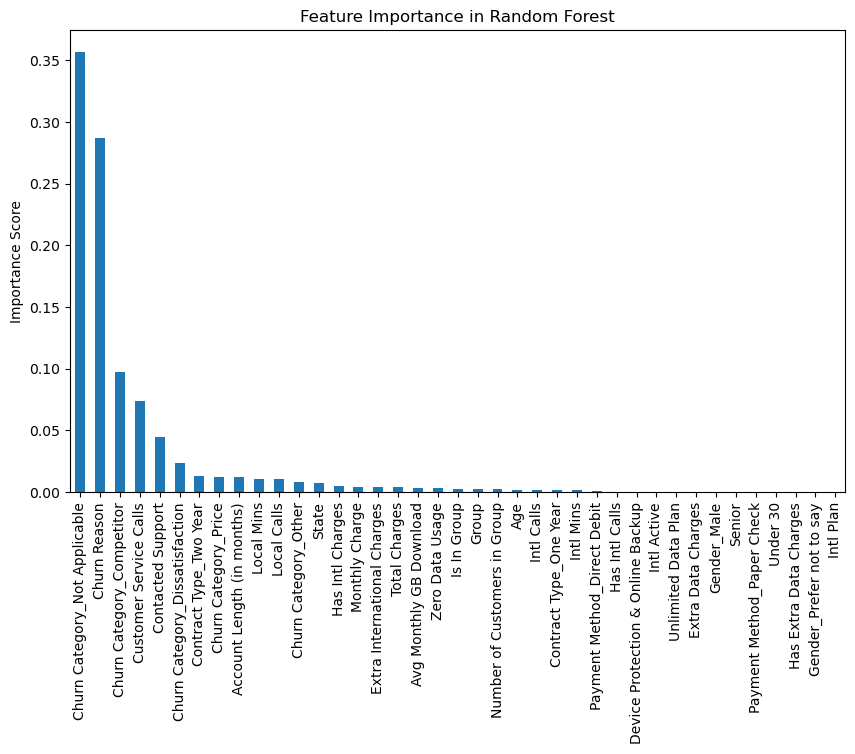

In [194]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `random_forest` is the trained Random Forest model
feature_importances = pd.Series(random_forest.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

# Plotting the feature importance
plt.figure(figsize=(10,6))
feature_importances.plot(kind='bar')
plt.title("Feature Importance in Random Forest")
plt.ylabel("Importance Score")
plt.show()


In [ ]:
# Mdel Recommendation


- **Best Overall Model**: **SVC** and **Gradient Boosting** both provide the highest ROC-AUC scores, making them the best models for distinguishing between churners and non-churners. However, due to the risk of overfitting, **Random Forest** is a more stable option with excellent performance.
- **For High Recall**: If capturing most churners is the priority, **Logistic Regression** with threshold tuning can be a good choice due to its high recall. However, precision for churners remains low.
- **For Balanced Performance**: **Random Forest** strikes the best balance between precision, recall, and generalization, making it the most robust and versatile model for this dataset.


## Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of databel management interested in improve the churn

In [ ]:
# Below the report

### Customer Churn Prediction Analysis Report

#### Executive Summary:
This report outlines the findings from our customer churn analysis, aimed at helping **Databel** reduce churn and improve customer retention. By applying several machine learning models to customer data, we identified key factors driving churn and developed predictive models to identify customers most at risk of leaving. The analysis results provide clear recommendations to guide Databel's efforts in minimizing churn and improving customer loyalty.

#### Key Objectives:
- **Understand the key factors** that contribute to customer churn at Databel.
- **Develop predictive models** to identify high-risk customers.
- **Provide actionable insights and recommendations** to retain customers and reduce churn rates.

#### Data Overview:
We analyzed a dataset containing information on over 6,000 Databel customers. The dataset included the following types of features:
- **Customer Usage Metrics**: Call minutes (local and international), customer service call frequency, data plan usage, and contract type.
- **Customer Demographics**: Age, gender, group size, and senior status.
- **Financial Data**: Monthly charges, total charges, and payment methods.

##### Key Features Identified:
From our analysis, the most important factors contributing to customer churn were:
1. **Churn Category (Not Applicable)**: A large number of churn cases fell under this category, indicating a need for better understanding of underlying reasons.
2. **Churn Reason**: Specific reasons for churn, including dissatisfaction, competition, and price, played a major role in predicting churn.
3. **Churn Category (Competitor)**: Many customers left for competitor offerings, indicating that Databel needs to focus on competitiveness.
4. **Customer Service Calls**: Customers with high interactions with customer service were at increased risk of churn, suggesting dissatisfaction with the service.
5. **Contacted Support**: Frequent customer support interactions were linked with a higher likelihood of churn.

#### Model Evaluation and Performance:
We evaluated six machine learning models to predict customer churn, assessing their performance using metrics like ROC-AUC, accuracy, and precision-recall:

1. **Logistic Regression**:
   - **ROC-AUC Score**: 0.9247
   - **Key Insight**: Logistic Regression provides balanced performance with strong recall (**0.84**) for churners, capturing most customers at risk of churn. However, it struggles with **precision for churners** at **0.72**, indicating some misclassification of non-churners as churners (false positives). 

2. **K-Nearest Neighbors (KNN)**:
   - **ROC-AUC Score**: 0.9994
   - **Key Insight**: High accuracy but potential overfitting, making it less reliable when applied to new data.

3. **Support Vector Classifier (SVC)**:
   - **ROC-AUC Score**: 0.99995
   - **Key Insight**: Best overall performance with near-perfect classification but requires significant computational power and may overfit.

4. **Decision Tree**:
   - **ROC-AUC Score**: 0.9983
   - **Key Insight**: Solid performance, but more prone to overfitting, reducing its ability to generalize.

5. **Random Forest**:
   - **ROC-AUC Score**: 0.99998
   - **Key Insight**: High accuracy and less prone to overfitting, making it a robust model for customer churn prediction.

6. **Gradient Boosting**:
   - **ROC-AUC Score**: 0.99999
   - **Key Insight**: Exceptional results but prone to overfitting. This model requires careful monitoring to ensure it generalizes well to new data.

#### Recommendations:
Based on the model results and feature importance, we propose the following recommendations for reducing churn at Databel:

1. **Best Model for Deployment**:
   - **Random Forest** is recommended for deployment due to its strong balance between accuracy and generalization ability. It is the most robust model, performing well without overfitting, making it suitable for real-world application.

2. **Focus on Key Drivers of Churn**:
   - **Competitor-driven churn**: Databel should focus on improving its offerings to remain competitive and reduce the risk of losing customers to competitors.
   - **Customer Service Improvements**: Since high customer service call frequency indicates dissatisfaction, improving customer service quality is essential to retaining customers. Introducing proactive support measures could reduce the number of dissatisfied customers.
   - **Churn due to dissatisfaction and price**: Addressing customer complaints and concerns about pricing by offering better pricing plans or incentives can reduce churn driven by dissatisfaction or cost.

3. **Customer Retention Strategies**:
   - **Flexible Payment Options**: Offer more flexible payment plans for customers, particularly those using paper checks, as this group tends to churn more frequently.
   - **Tailored Discounts**: Provide special offers or discounts to customers on month-to-month contracts to encourage them to stay longer and switch to more stable, long-term contracts.
   - **Enhance Online Self-Service**: Improving the self-service options for customers who interact with Databel online can help reduce frustration and prevent churn due to dissatisfaction with the website or service access.

#### Conclusion:
This analysis provides Databel with a comprehensive understanding of the factors driving customer churn. **Random Forest** emerged as the most effective model for identifying high-risk customers. By focusing on competition, improving customer service, and addressing customer dissatisfaction, Databel can effectively reduce churn and improve customer loyalty. Implementing these targeted retention strategies will enhance customer satisfaction and ultimately lead to stronger business performance.

